### О задании

В этом задании вам предстоит предсказывать год выпуска песни (**задача регрессии**) по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [ ]:
import random

import numpy as np
import pandas as pd
import torch
from torch import nn

In [ ]:
# %conda install wget

In [ ]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2024-12-02 10:21:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.txt.zip’

data.txt.zip            [<=>                 ] 201.24M  7.47MB/s    in 15s     

2024-12-02 10:21:59 (13.8 MB/s) - ‘data.txt.zip’ saved [211011981]



In [ ]:
df = pd.read_csv("data.txt.zip", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       515345 non-null  int64  
 1   1       515345 non-null  float64
 2   2       515345 non-null  float64
 3   3       515345 non-null  float64
 4   4       515345 non-null  float64
 5   5       515345 non-null  float64
 6   6       515345 non-null  float64
 7   7       515345 non-null  float64
 8   8       515345 non-null  float64
 9   9       515345 non-null  float64
 10  10      515345 non-null  float64
 11  11      515345 non-null  float64
 12  12      515345 non-null  float64
 13  13      515345 non-null  float64
 14  14      515345 non-null  float64
 15  15      515345 non-null  float64
 16  16      515345 non-null  float64
 17  17      515345 non-null  float64
 18  18      515345 non-null  float64
 19  19      515345 non-null  float64
 20  20      515345 non-null  float64
 21  21      51

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [ ]:
from matplotlib import pylab as plt
import seaborn as sns

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

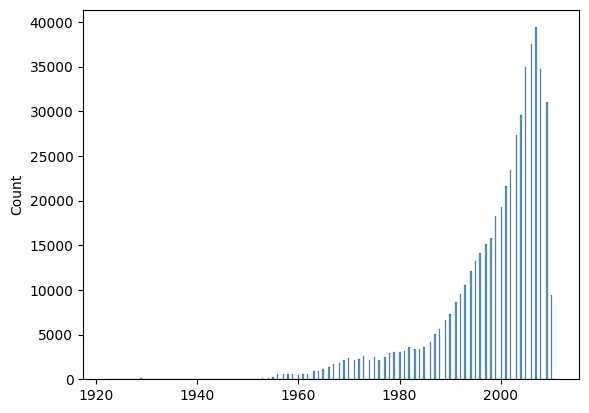

In [ ]:
sns.histplot(data=df, x=y)
plt.show()

Данные неслабансированные, по-любому придётся применять стандартизацию/нормализацию

### Ridge

In [ ]:
# наилучший константный прогноз (вроде это можно и руками посчитать, но в склерне есть готовая модель... :))
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean') # для mse/rmse
dummy.fit(X_train, y_train)

y_pred = dummy.predict(X_test)
rmse_dummy = root_mean_squared_error(y_test, y_pred)
print('RMSE наилучшего константного прогноза:', rmse_dummy)

RMSE наилучшего константного прогноза: 10.85246390513634


In [ ]:
# стандаритизировать данные всегда хорошо
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# подбираем alpha по кросс-валидации
ridge_alphas = np.logspace(0, 6, 200)

ridge_cv = RidgeCV(fit_intercept=False, alphas=ridge_alphas, # установили fit_intercept=False (убрали смещение), потому что стандартизировали данные и считаем, что интерсепт им не нужен
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

print(f'Best alpha: {ridge_cv.alpha_}')

Best alpha: 1.0


In [ ]:
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train_scaled, y_train)

y_pred_train, y_pred_test = ridge.predict(X_train_scaled), ridge.predict(X_test_scaled)

rmse_train, rmse_test = root_mean_squared_error(y_train, y_pred_train), root_mean_squared_error(y_test, y_pred_test)
print(f"RMSE train: {rmse_train:.5f}\nRMSE test: {rmse_test:.5f}")

RMSE train: 9.55282
RMSE test: 9.51016


RMSE получился лучше константного прогноза, поэтому можем считать, что регуляризация справилась хорошо!

Но нам нужно получить хотя бы 9...

## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Не забудьте, что для улучшения качества модели вам поможет **нормировка таргета**.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [ ]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

In [ ]:
def train(model, optimizer, criterion, train_loader, test_loader):
    """
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    """
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    raise NotImplementedError


def test(model, criterion, test_loader):
    """
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    """
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    predicts = torch.ones(len(test_loader.dataset))
    return predicts

In [ ]:
assert test(model, criterion, test_loader).shape[0] == y_test.shape[0]

### Try №1

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
from torch.utils.data import Dataset, DataLoader, TensorDataset
import tqdm

In [ ]:
# для отрисовки графиков
def plot(histories):
    plt.figure(figsize=(16,10))

    for name, val_loss in histories:
        plt.plot(val_loss, label=name)

    plt.legend()

In [ ]:
set_random_seed(42)

In [ ]:
INPUT_SIZE = 90       # у нас 90 признаков
HIDDEN_SIZE = 45      # ~ input_size / 2
OUTPUT_SIZE = 1       # решаем задачу регрессии, поэтому на выходе должны получить одно число
BATCH_SIZE = 128      # обычно брали 64, возьмем побольше
EPOCHS = 100
LEARNING_RATE = 0.001

In [ ]:
# сначала поработаем с не стандартизованными данными
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = data_utils.TensorDataset(torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train))
    train_loader = data_utils.DataLoader(dataset=train_tensor,
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)

    test_tensor = data_utils.TensorDataset(torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test))
    test_loader = data_utils.DataLoader(dataset=test_tensor,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)
    return train_loader, test_loader

In [ ]:
train_loader, test_loader = create_data_loader(X_train, y_train, X_test, y_test)

In [ ]:
class MyModel(nn.Module):
    """2 слоя
    функция активации — ReLU
    после каждого скрытого слоя dropout"""
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.layer2 = nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)
        self.output = nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE)

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.dropout1(x)
        x = self.act2(self.layer2(x))
        x = self.dropout2(x)
        x = self.output(x)
        return x

In [ ]:
# TRAIN LOOP
def run_train(model, optimizer, criterion, scheduler=None):
    train_loss_values = []
    valid_loss_values = []

    for epoch in range(EPOCHS):
        model.train()
        running_loss = []
        progress_bar = tqdm.tqdm(train_loader, desc=f'Epoch {epoch+1}/{EPOCHS}', leave=False)

        for features, label in progress_bar:
            # Reset gradients
            optimizer.zero_grad()

            # run model on the chosen batch
            output = model(features).squeeze(-1)

            # Calculate error and backpropagate
            label = label.float()

            loss = torch.sqrt(criterion(output, label)) # RMSE
            loss.backward()

            # Update weights with gradients
            optimizer.step()

            running_loss.append(loss.item())

            # Update progress_bar
            progress_bar.set_postfix(train_loss=np.mean(running_loss))


        train_loss_values.append(np.mean(running_loss))

        # Run validation
        model.eval()
        running_loss = []


        with torch.no_grad(): # in validation loop we do not need gradients calculation; so switch it off
            for features, label in test_loader:
                output = model(features).squeeze(-1)

                # Calculate error
                label = label.float()
                loss = torch.sqrt(criterion(output, label)) # RMSE

                running_loss.append(loss.item())

            valid_loss_values.append(np.mean(running_loss))

            progress_bar.set_postfix(train_loss=float(train_loss_values[-1]), valid_loss=float(valid_loss_values[-1]))

            if epoch % 10 == 0:
                print(f'EPOCH {epoch+1}, train_loss: {train_loss_values[-1]}, valid_loss: {valid_loss_values[-1]}')

        if scheduler is not None:
            # Decay Learning Rate
            scheduler.step()

    return train_loss_values, valid_loss_values

In [ ]:
model = MyModel()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, betas=(0.9, 0.999), eps=1e-08)
criterion = nn.MSELoss()

In [ ]:
# запускаем обучение и молимся
train_loss_values, valid_loss_values = run_train(model, optimizer=optimizer, criterion=criterion)

EPOCH 1, train_loss: 549.7774894981795, valid_loss: 86.86633720020257


EPOCH 11, train_loss: 178.9509307246428, valid_loss: 28.487487455405812


EPOCH 21, train_loss: 171.8354886397452, valid_loss: 25.558178745874084


EPOCH 31, train_loss: 169.1178153214651, valid_loss: 21.231591623608427


EPOCH 41, train_loss: 164.64025741185466, valid_loss: 16.49981683787733


EPOCH 51, train_loss: 162.56204266802172, valid_loss: 23.669732077286977


EPOCH 61, train_loss: 158.13744162828792, valid_loss: 15.844129014723372


EPOCH 71, train_loss: 155.7701262817046, valid_loss: 12.671529392204663


EPOCH 81, train_loss: 151.79870933134714, valid_loss: 14.021642234065745


EPOCH 91, train_loss: 149.3872094866389, valid_loss: 10.624320080964873


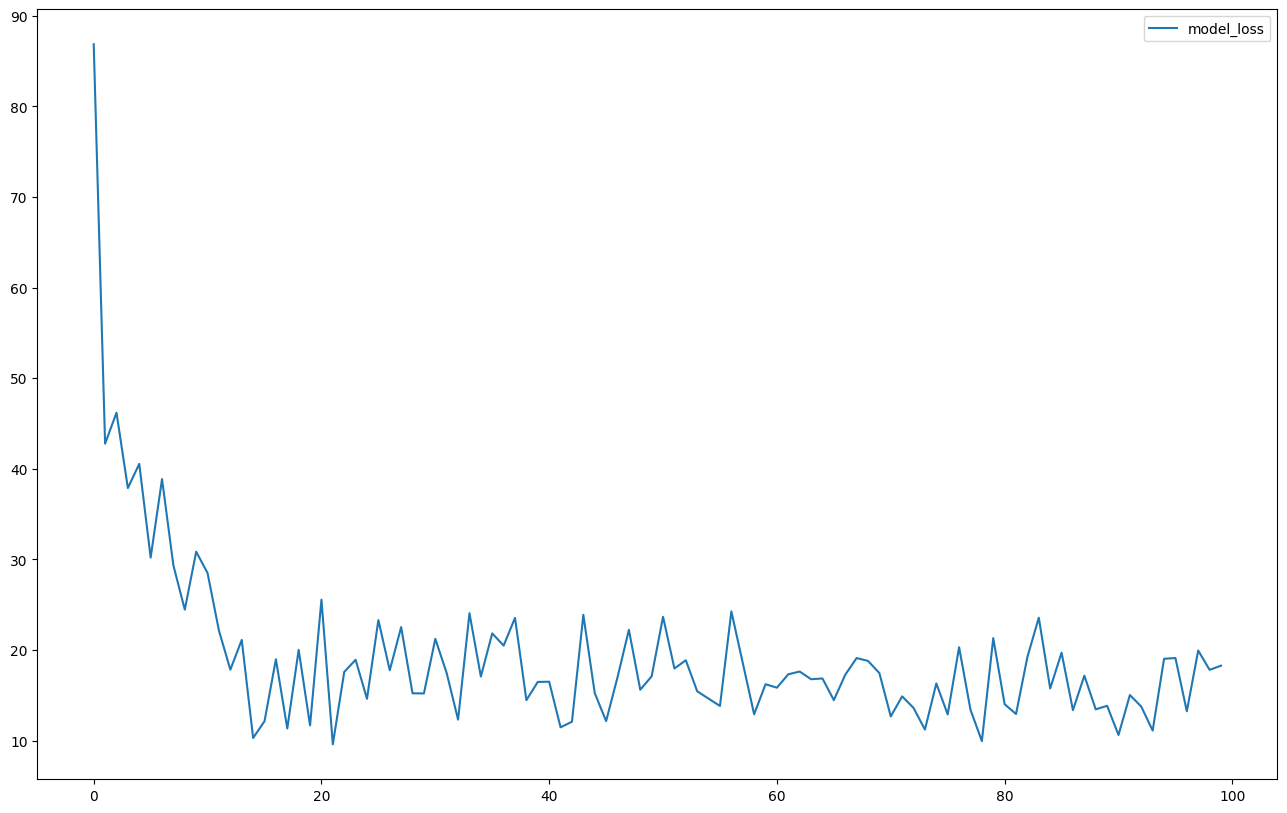

In [ ]:
plot([('model_loss', valid_loss_values)]) # красота....)

### Try №2

Попробуем применить к данным StandardScaler

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
train_loader, test_loader = create_data_loader(X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
model1 = MyModel()
optimizer = optim.Adam(model1.parameters(), lr=LEARNING_RATE, betas=(0.9, 0.999), eps=1e-08)
criterion = nn.MSELoss()

In [ ]:
# запускаем обучение и молимся
train_loss_values, valid_loss_values1 = run_train(model1, optimizer=optimizer, criterion=criterion)

EPOCH 1, train_loss: 546.7613644032658, valid_loss: 90.20879005205514


EPOCH 11, train_loss: 184.0527189519568, valid_loss: 25.130423397120865


EPOCH 21, train_loss: 174.00863939327922, valid_loss: 13.96531643725858


EPOCH 31, train_loss: 169.19963540801876, valid_loss: 16.699366590764264


EPOCH 41, train_loss: 164.51037645247837, valid_loss: 18.743929662326774


EPOCH 51, train_loss: 160.10223929657647, valid_loss: 17.82136577190739


EPOCH 61, train_loss: 157.87654015427626, valid_loss: 15.22644616117572


EPOCH 71, train_loss: 153.5685395112592, valid_loss: 17.149990511412668


EPOCH 81, train_loss: 151.54294538379472, valid_loss: 15.453872399755044


EPOCH 91, train_loss: 149.1550451158128, valid_loss: 20.68163776869821


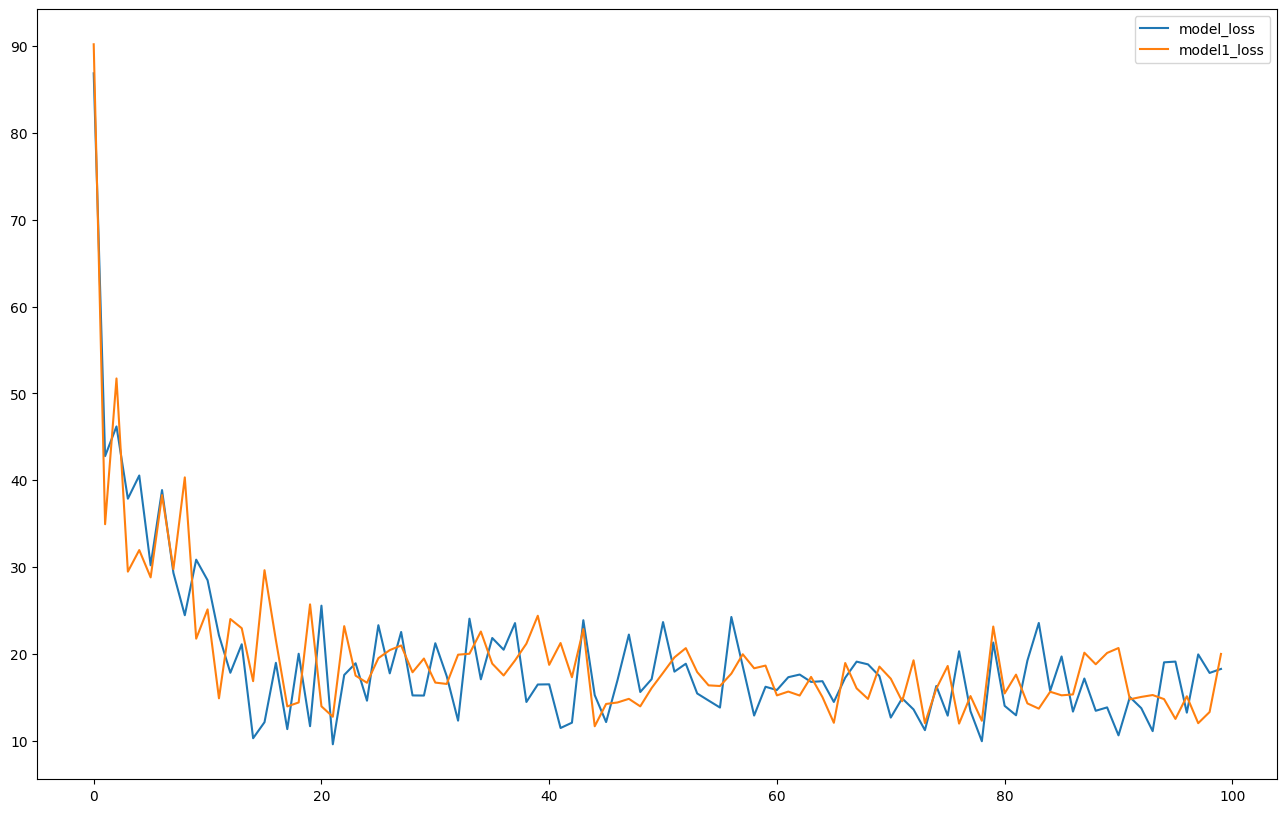

In [ ]:
plot([('model_loss', valid_loss_values),
      ('model1_loss', valid_loss_values1)]) # по цифрам как будто не очень, хотя на графике вроде бы получше выглядит (не так сильно скачет в середине)

### Try №3

In [ ]:
INPUT_SIZE = 90
HIDDEN_SIZE = 45
OUTPUT_SIZE = 1
BATCH_SIZE = 128
EPOCHS = 100
LEARNING_RATE = 0.01 # 0.001 -> 0.01

In [ ]:
model2 = MyModel()
optimizer = optim.Adam(model2.parameters(), lr=LEARNING_RATE, betas=(0.9, 0.999), eps=1e-08)
criterion = nn.MSELoss()

In [ ]:
# запускаем обучение и молимся
train_loss_values, valid_loss_values2 = run_train(model2, optimizer=optimizer, criterion=criterion)

EPOCH 1, train_loss: 280.1916796699796, valid_loss: 50.677790651226985


EPOCH 11, train_loss: 145.47581419811834, valid_loss: 23.77924309154548


EPOCH 21, train_loss: 124.98755984789358, valid_loss: 16.89209224209927


EPOCH 31, train_loss: 106.77951353885442, valid_loss: 11.941515674685487


EPOCH 41, train_loss: 88.52627545787655, valid_loss: 12.169257932370252


EPOCH 51, train_loss: 70.68746605940757, valid_loss: 13.181801913988473


EPOCH 61, train_loss: 53.248238310049224, valid_loss: 9.941995082515302


EPOCH 71, train_loss: 36.64518725789781, valid_loss: 11.866586293324385


EPOCH 81, train_loss: 22.054924291831302, valid_loss: 10.953908954516496


EPOCH 91, train_loss: 12.815093131543128, valid_loss: 9.910912220430847


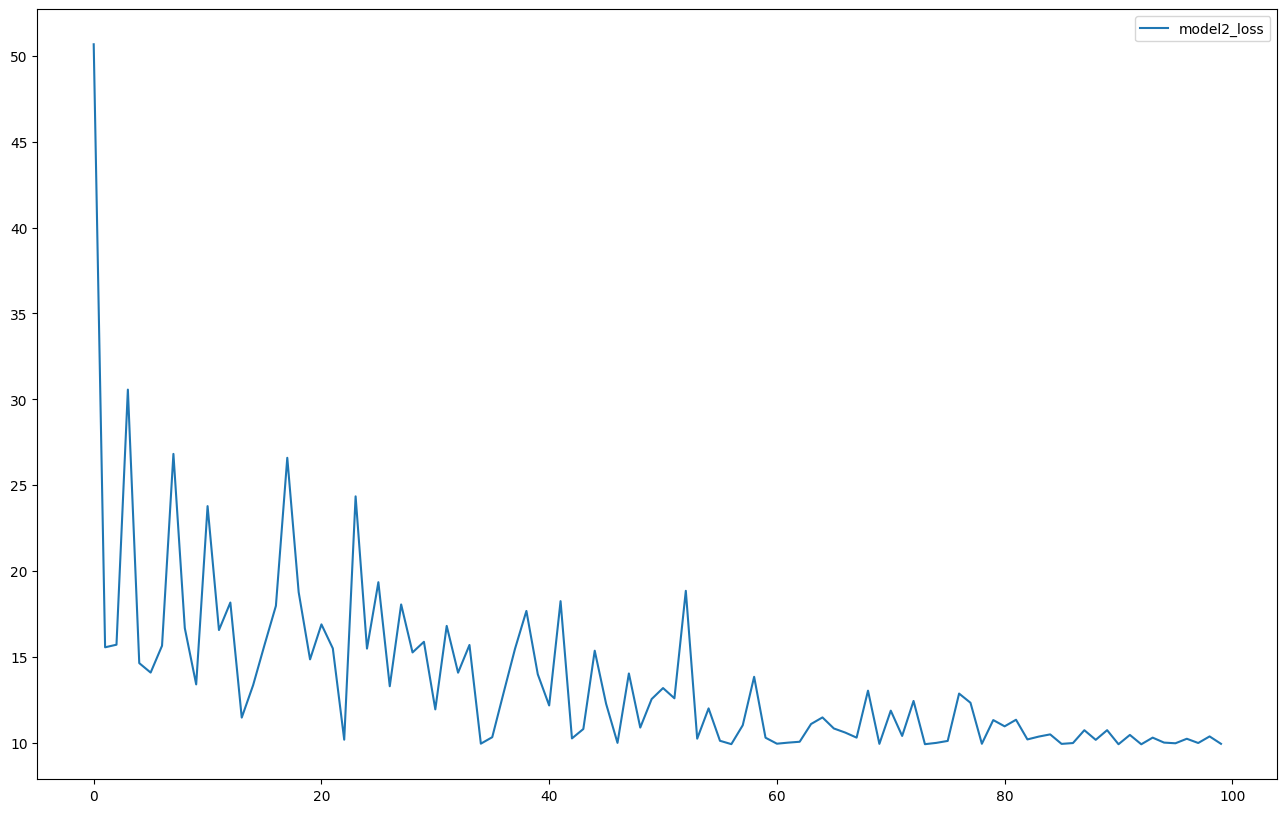

In [ ]:
# у меня не сохранились предыдущие значения лосса, поэтому пришлось заново отрисовывать графики(
plot([('model2_loss', valid_loss_values2)]) # уже прям красота, но всё равно всё ещё хуже бейзлайна

### Try №4

Попробуем теперь поменять что-то в архитектуре

In [ ]:
INPUT_SIZE = 90
HIDDEN_SIZE = 45
OUTPUT_SIZE = 1
BATCH_SIZE = 128
EPOCHS = 100
LEARNING_RATE = 0.01

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.layer2 = nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE)
        self.act2 = nn.ReLU()
        # self.dropout2 = nn.Dropout(0.2)         Убрала один дропаут
        self.output = nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE)

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.dropout1(x)
        x = self.act2(self.layer2(x))
        # x = self.dropout2(x)                    Убрала один дропаут
        x = self.output(x)
        return x

In [ ]:
model3 = MyModel()
optimizer = optim.Adam(model3.parameters(), lr=LEARNING_RATE, betas=(0.9, 0.999), eps=1e-08)
criterion = nn.MSELoss()

In [ ]:
train_loss_values, valid_loss_values3 = run_train(model3, optimizer=optimizer, criterion=criterion)

EPOCH 1, train_loss: 181.46409838363473, valid_loss: 18.060025189182547


EPOCH 11, train_loss: 9.622209010386118, valid_loss: 8.643068422775457


EPOCH 21, train_loss: 9.67327517499721, valid_loss: 8.790000179616532


EPOCH 31, train_loss: 9.627798837224258, valid_loss: 8.855110971054229


EPOCH 41, train_loss: 9.6665419116061, valid_loss: 9.006654705741617


EPOCH 51, train_loss: 9.668029312135895, valid_loss: 9.260670122533742


EPOCH 61, train_loss: 9.665036890739042, valid_loss: 8.686660590148207


EPOCH 71, train_loss: 9.73163176741088, valid_loss: 9.099797119008432


EPOCH 81, train_loss: 9.71638911118535, valid_loss: 8.768425849994811


EPOCH 91, train_loss: 9.779960275518937, valid_loss: 8.686887505030867


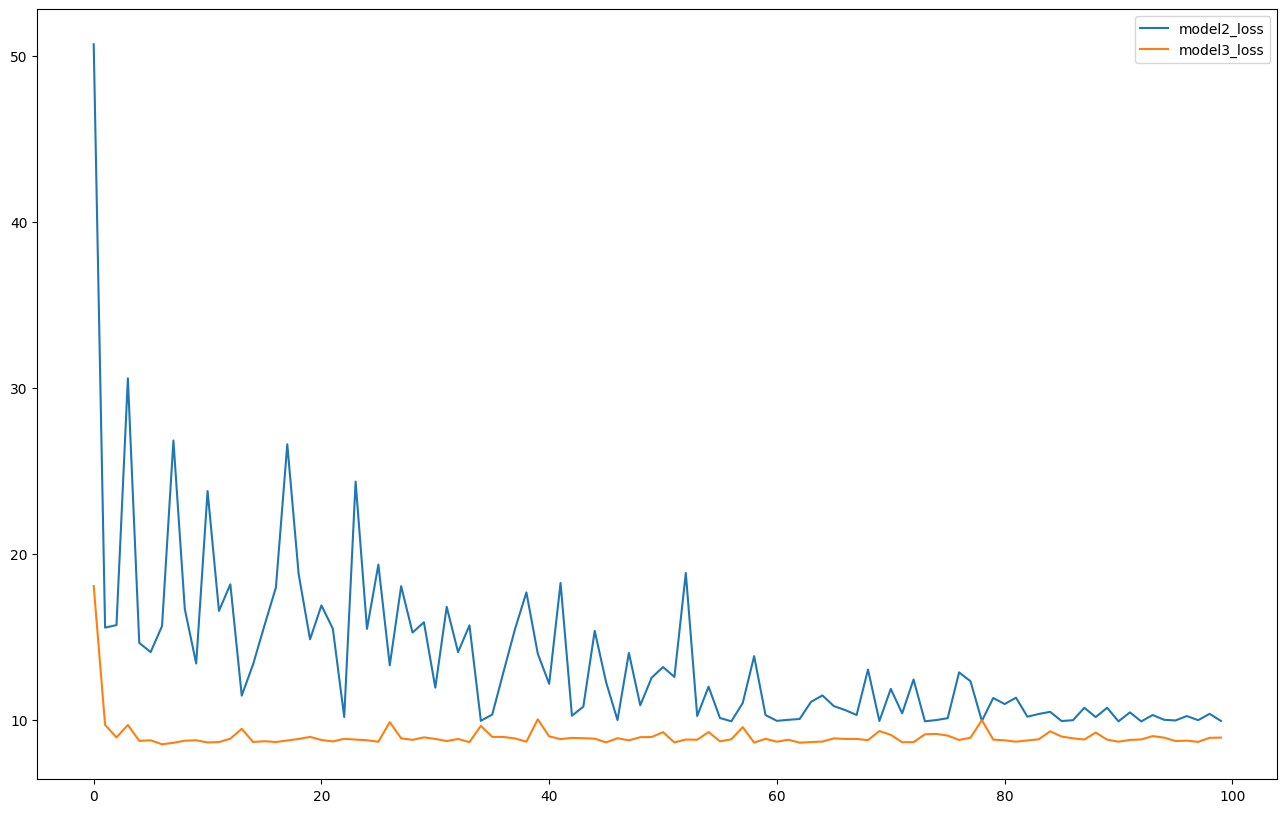

In [ ]:
plot([('model2_loss', valid_loss_values2),
      ('model3_loss', valid_loss_values3)])

#### Try №5

Посмотрим, что будет без дропаута вообще

In [ ]:
INPUT_SIZE = 90
HIDDEN_SIZE = 45
OUTPUT_SIZE = 1
BATCH_SIZE = 128
EPOCHS = 60 # 100 -> 60     Каежтся, что 100 эпох — много, минимальный лосс достигается на ~ 60 эпохе, а дальше он скачет, поэтому попробуем уменьшить их кол-во
LEARNING_RATE = 0.01

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE)
        self.act1 = nn.ReLU()
        # self.dropout1 = nn.Dropout(0.2)         убрала второй дропаут
        self.layer2 = nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE)
        self.act2 = nn.ReLU()
        # self.dropout2 = nn.Dropout(0.2)
        self.output = nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE)

    def forward(self, x):
        x = self.act1(self.layer1(x))
        # x = self.dropout1(x)                    убрала второй дропаут
        x = self.act2(self.layer2(x))
        # x = self.dropout2(x)
        x = self.output(x)
        return x

In [ ]:
model4 = MyModel()
optimizer = optim.Adam(model4.parameters(), lr=LEARNING_RATE, betas=(0.9, 0.999), eps=1e-08)
criterion = nn.MSELoss()

In [ ]:
train_loss_values, valid_loss_values4 = run_train(model4, optimizer=optimizer, criterion=criterion)

EPOCH 1, train_loss: 86.49660572964876, valid_loss: 21.455392915423555


EPOCH 11, train_loss: 14.749825456015419, valid_loss: 15.40003241406809


EPOCH 21, train_loss: 13.269947730866447, valid_loss: 11.033325720541548


EPOCH 31, train_loss: 12.61675713702588, valid_loss: 11.133461851884823


EPOCH 41, train_loss: 11.824250585954557, valid_loss: 10.994916718785126


EPOCH 51, train_loss: 11.452894840719553, valid_loss: 10.695226958482573


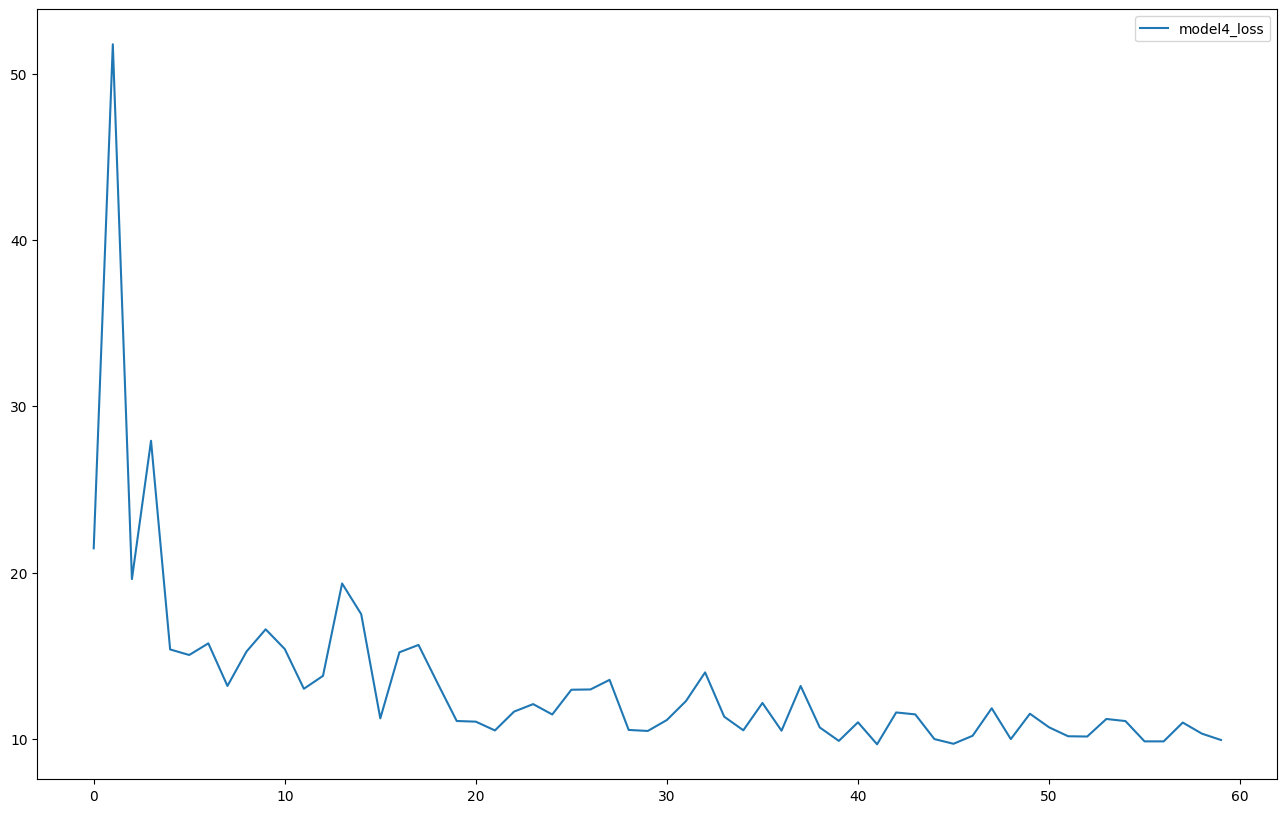

In [ ]:
plot([('model4_loss', valid_loss_values4)])

### Try №6

Добавим scheduler

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)           # первый дропаут после активации вернули
        self.layer2 = nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE)
        self.act2 = nn.ReLU()
        # self.dropout2 = nn.Dropout(0.2)
        self.output = nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE)

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.dropout1(x)
        x = self.act2(self.layer2(x))
        # x = self.dropout2(x)
        x = self.output(x)
        return x

In [ ]:
model5 = MyModel()
optimizer = optim.Adam(model5.parameters(), lr=LEARNING_RATE, betas=(0.9, 0.999), eps=1e-08)
criterion = nn.MSELoss()

In [ ]:
from torch.optim.lr_scheduler import CyclicLR

# будем шагать между 0.01 и 0.1
scheduler = CyclicLR(optimizer, base_lr=0.01, max_lr=0.1, mode='triangular2') # “triangular2”: A basic triangular cycle that scales initial amplitude by half each cycle
# я в семинарской тетрадке пробовала разные schedulers и этот мне показался самым эффективным

In [ ]:
train_loss_values, valid_loss_values5, lr_history = run_train(model5, optimizer=optimizer, criterion=criterion, scheduler=scheduler)

EPOCH 1, train_loss: 192.04054109055858, valid_loss: 22.586521498047478


EPOCH 11, train_loss: 9.6115171537523, valid_loss: 9.168684433002284


EPOCH 21, train_loss: 9.633046946208385, valid_loss: 8.605831396461713


EPOCH 31, train_loss: 9.659266587024955, valid_loss: 8.785422256087312


EPOCH 41, train_loss: 9.664347560307679, valid_loss: 9.07731290028827


EPOCH 51, train_loss: 9.68656254814963, valid_loss: 8.673633255580864


ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
# plot([('lr_history_model5', lr_history)])

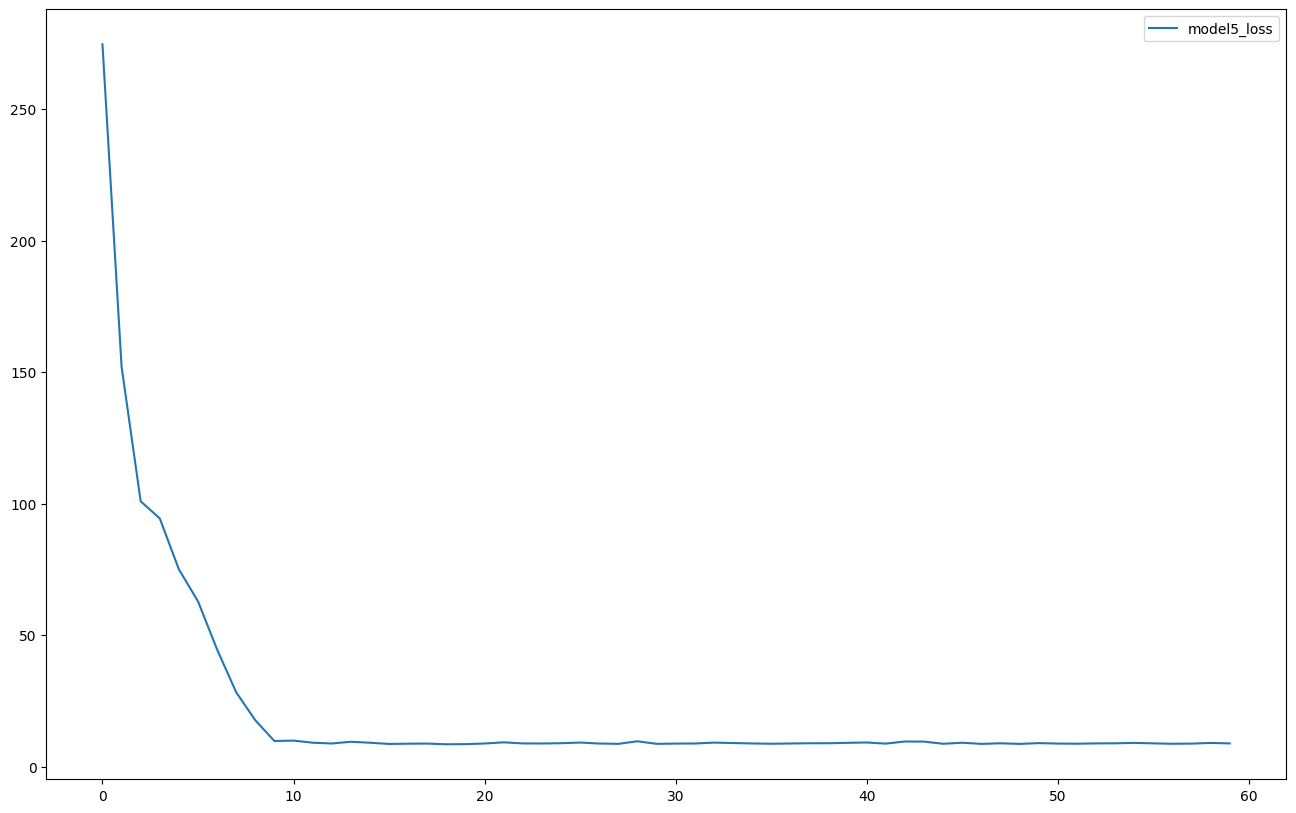

In [ ]:
plot([('model5_loss', valid_loss_values5)])

#### Try №7

Попробуем добавить batchnorm

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE)
        self.batchnorm1 = nn.BatchNorm1d(HIDDEN_SIZE)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.layer2 = nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE)
        self.batchnorm2 = nn.BatchNorm1d(HIDDEN_SIZE)
        self.act2 = nn.ReLU()
        # self.dropout2 = nn.Dropout(0.2)
        self.output = nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE)

    def forward(self, x):
        x = self.layer1(x)
        x = self.batchnorm1(x)
        x = self.act1(x)
        x = self.dropout1(x)
        x = self.layer2(x)
        x = self.batchnorm2(x)
        x = self.act2(x)
        # x = self.dropout2(x)
        x = self.output(x)
        return x

In [ ]:
model6 = MyModel()
optimizer = optim.Adam(model6.parameters(), lr=LEARNING_RATE, betas=(0.9, 0.999), eps=1e-08)
criterion = nn.MSELoss()
scheduler = CyclicLR(optimizer, base_lr=0.01, max_lr=0.1, mode='triangular2')

In [ ]:
train_loss_values, valid_loss_values6 = run_train(model6, optimizer=optimizer, criterion=criterion, scheduler=scheduler)

EPOCH 1, train_loss: 172.7902214061875, valid_loss: 13.087346372037832


EPOCH 11, train_loss: 9.20295337047361, valid_loss: 8.265886803074638


EPOCH 21, train_loss: 9.167954471997717, valid_loss: 8.22736365252202


EPOCH 31, train_loss: 9.13912310167271, valid_loss: 8.329416520524733


EPOCH 41, train_loss: 9.134010126470303, valid_loss: 8.513101105052646


EPOCH 51, train_loss: 9.138545272168026, valid_loss: 8.642171122059963


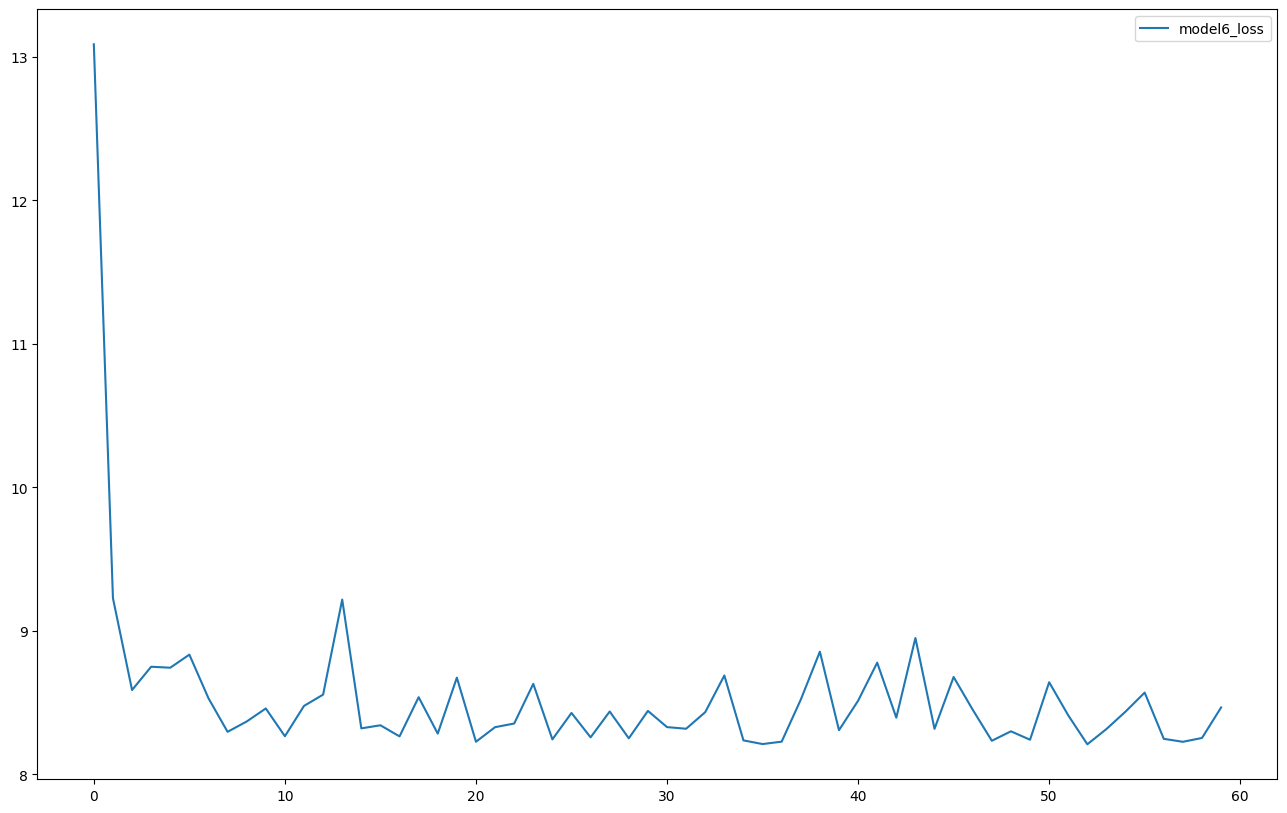

In [ ]:
plot([('model6_loss', valid_loss_values6)]) # по лоссу вроде бы стало лучше

### Try №8

Попробуем еще покрутить архитектуру..)

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE)
        self.batchnorm1 = nn.BatchNorm1d(HIDDEN_SIZE)
        self.act1 = nn.LeakyReLU()        # ReLU -> Leaky ReLU
        self.dropout1 = nn.Dropout(0.2)
        self.layer2 = nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE)
        self.batchnorm2 = nn.BatchNorm1d(HIDDEN_SIZE)
        self.act2 = nn.LeakyReLU()        # ReLU -> Leaky ReLU
        self.output = nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE)

    def forward(self, x):
        x = self.layer1(x)
        x = self.batchnorm1(x)
        x = self.act1(x)
        x = self.dropout1(x)
        x = self.layer2(x)
        x = self.batchnorm2(x)
        x = self.act2(x)
        x = self.output(x)
        return x

In [ ]:
model7 = MyModel()
optimizer = optim.Adam(model7.parameters(), lr=LEARNING_RATE, betas=(0.9, 0.999), eps=1e-08)
criterion = nn.MSELoss()
scheduler = CyclicLR(optimizer, base_lr=0.01, max_lr=0.1, mode='triangular2')

In [ ]:
train_loss_values, valid_loss_values7 = run_train(model7, optimizer=optimizer, criterion=criterion, scheduler=scheduler) # кажется, стало еще лучше

EPOCH 1, train_loss: 175.2797383124941, valid_loss: 12.331604926893027


EPOCH 11, train_loss: 9.244562144441366, valid_loss: 8.900547454262725


EPOCH 21, train_loss: 9.162131283581338, valid_loss: 8.400821140497039


EPOCH 31, train_loss: 9.141196995981813, valid_loss: 8.35155970507329


EPOCH 41, train_loss: 9.116505994541422, valid_loss: 8.351986753468466


EPOCH 51, train_loss: 9.11588414742609, valid_loss: 8.309499460871857


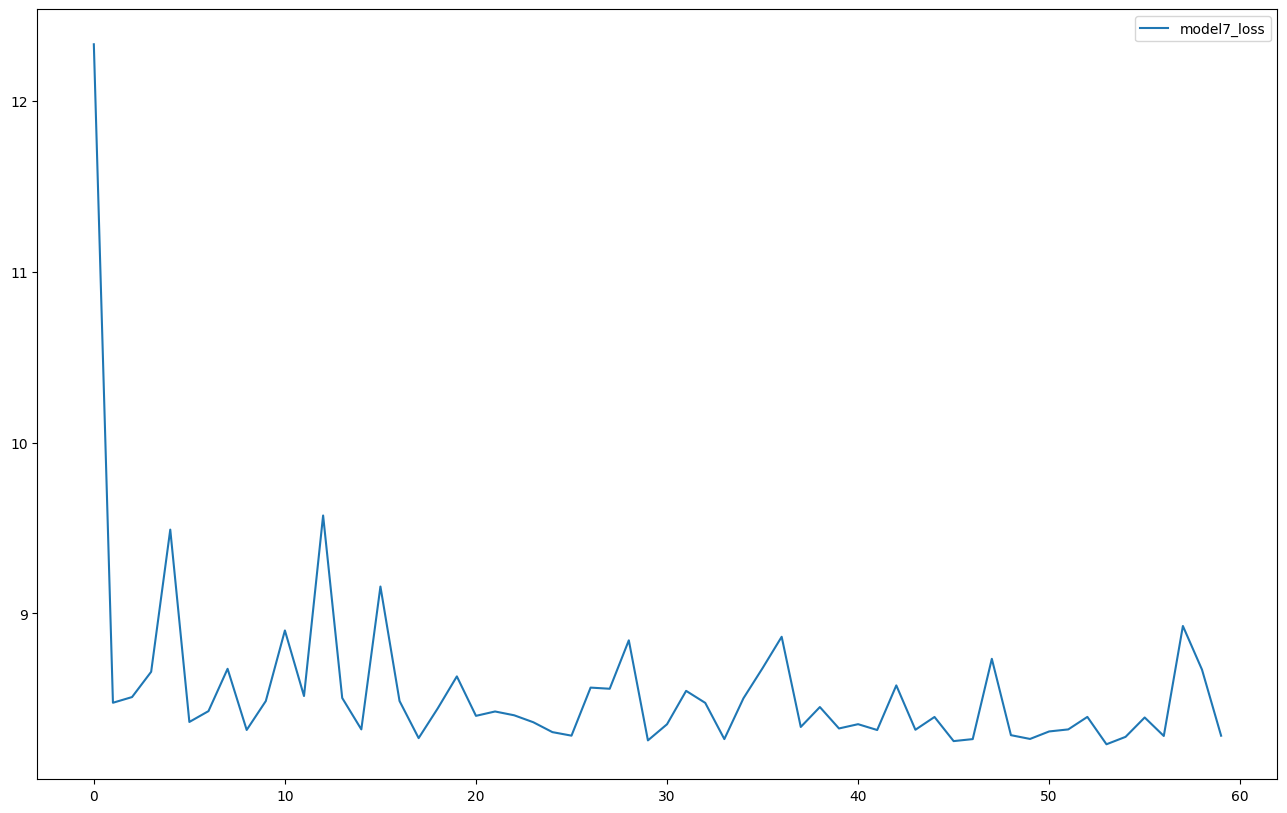

In [ ]:
plot([('model7_loss', valid_loss_values7)])

### Try №9

In [ ]:
INPUT_SIZE = 90
HIDDEN_SIZE = 90 # 45 -> 90
OUTPUT_SIZE = 1
BATCH_SIZE = 128
EPOCHS = 60
LEARNING_RATE = 0.01

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE) # 45 -> 90 нейронов
        self.batchnorm1 = nn.BatchNorm1d(HIDDEN_SIZE)
        self.act1 = nn.LeakyReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.layer2 = nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE // 2) # выход — 45 нейронов
        self.batchnorm2 = nn.BatchNorm1d(HIDDEN_SIZE // 2)
        self.act2 = nn.LeakyReLU()
        self.output = nn.Linear(in_features=HIDDEN_SIZE // 2, out_features=OUTPUT_SIZE)

    def forward(self, x):
        x = self.layer1(x)
        x = self.batchnorm1(x)
        x = self.act1(x)
        x = self.dropout1(x)
        x = self.layer2(x)
        x = self.batchnorm2(x)
        x = self.act2(x)
        x = self.output(x)
        return x

In [ ]:
from torch.optim.lr_scheduler import CyclicLR

model8 = MyModel()
optimizer = optim.Adam(model8.parameters(), lr=LEARNING_RATE, betas=(0.9, 0.999), eps=1e-08)
criterion = nn.MSELoss()
scheduler = CyclicLR(optimizer, base_lr=0.01, max_lr=0.1, mode='triangular2')

In [ ]:
train_loss_values, valid_loss_values8 = run_train(model8, optimizer=optimizer, criterion=criterion, scheduler=scheduler)

EPOCH 1, train_loss: 173.92319622903182, valid_loss: 9.081320840533417


EPOCH 11, train_loss: 9.161260385063185, valid_loss: 8.488518468814322


EPOCH 21, train_loss: 9.055857187471698, valid_loss: 8.820789583248667


EPOCH 31, train_loss: 9.006625102035517, valid_loss: 8.436827572265473


EPOCH 41, train_loss: 8.968354365722336, valid_loss: 8.244961307190433


EPOCH 51, train_loss: 8.958759805625096, valid_loss: 8.413725183741882


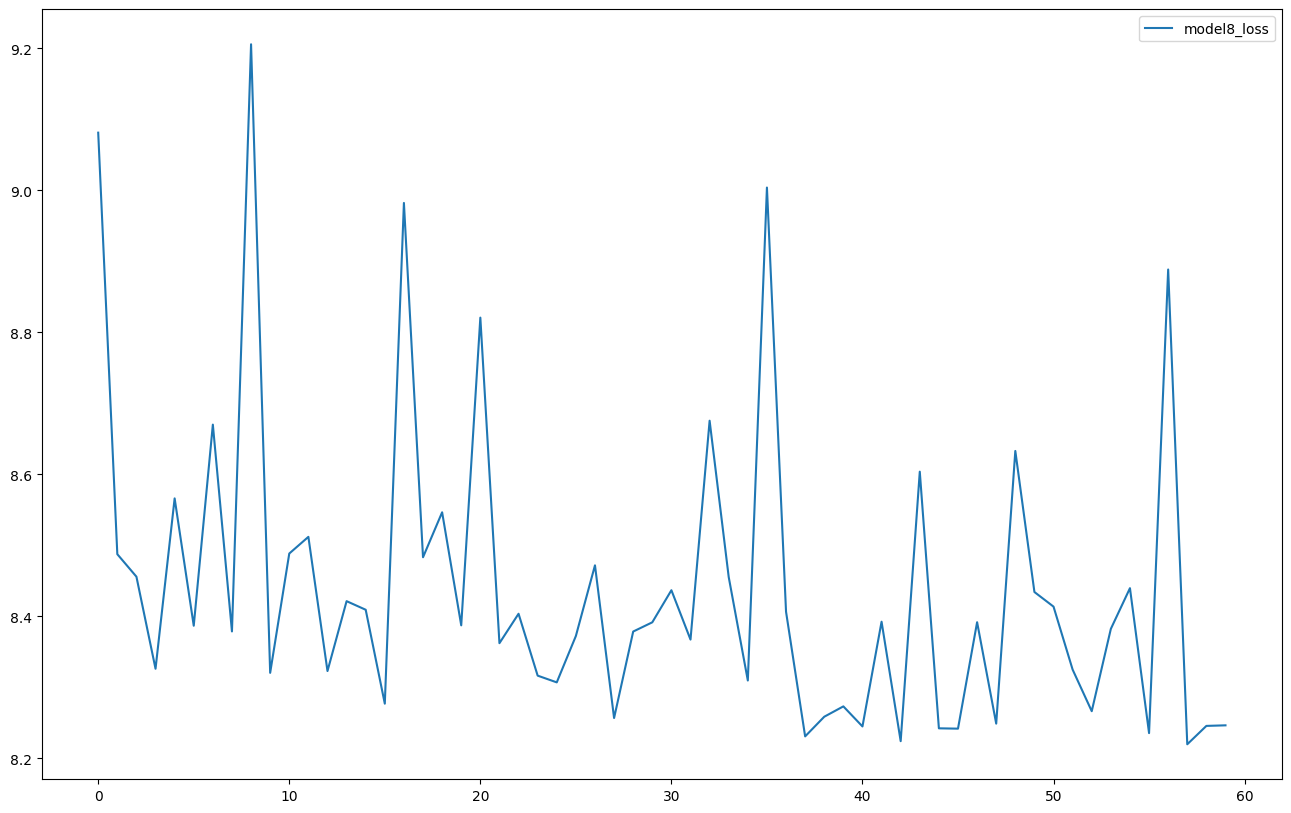

In [ ]:
plot([('model8_loss', valid_loss_values8)])

In [ ]:
valid_loss_values8[30:]

[8.436827572265473,
 8.3673005157178,
 8.675596152791883,
 8.455353913330796,
 8.309678558665928,
 9.004020767046674,
 8.406537875090494,
 8.23095839153422,
 8.258632122880162,
 8.273215440830382,
 8.244961307190433,
 8.392497414999669,
 8.224216833563133,
 8.603816405381307,
 8.242313098789442,
 8.241847367569951,
 8.391789231560018,
 8.248940765857697,
 8.632993015322354,
 8.434311879153299,
 8.413725183741882,
 8.32500588008673,
 8.266431427238011,
 8.382400472565452,
 8.439727862872699,
 8.235562489764526,
 8.888575668972317,
 8.219839316783565,
 8.245722819082808,
 8.246524433688363]

### Try №10

Попробуем добавить третий слой

In [ ]:
INPUT_SIZE = 90
HIDDEN_SIZE1 = 90
HIDDEN_SIZE2 = 45
HIDDEN_SIZE3 = 20
OUTPUT_SIZE = 1
BATCH_SIZE = 128
EPOCHS = 60
LEARNING_RATE = 0.01

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE1) # 90 нейронов
        self.batchnorm1 = nn.BatchNorm1d(HIDDEN_SIZE1)
        self.act1 = nn.LeakyReLU()
        self.dropout1 = nn.Dropout(0.2)

        self.layer2 = nn.Linear(in_features=HIDDEN_SIZE1, out_features=HIDDEN_SIZE2) # выход — 45 нейронов
        self.batchnorm2 = nn.BatchNorm1d(HIDDEN_SIZE2)
        self.act2 = nn.LeakyReLU()

        self.layer3 = nn.Linear(in_features=HIDDEN_SIZE2, out_features=HIDDEN_SIZE3) # выход — 20 нейронов
        self.batchnorm3 = nn.BatchNorm1d(HIDDEN_SIZE3)
        self.act3 = nn.LeakyReLU()
        self.output = nn.Linear(in_features=HIDDEN_SIZE3, out_features=OUTPUT_SIZE)

    def forward(self, x):
        x = self.layer1(x)
        x = self.batchnorm1(x)
        x = self.act1(x)
        x = self.dropout1(x)

        x = self.layer2(x)
        x = self.batchnorm2(x)
        x = self.act2(x)

        x = self.layer3(x)
        x = self.batchnorm3(x)
        x = self.act3(x)
        x = self.output(x)
        return x

In [ ]:
from torch.optim.lr_scheduler import CyclicLR

model9 = MyModel()
optimizer = optim.Adam(model9.parameters(), lr=LEARNING_RATE, betas=(0.9, 0.999), eps=1e-08)
criterion = nn.MSELoss()
scheduler = CyclicLR(optimizer, base_lr=0.01, max_lr=0.1, mode='triangular2')

In [ ]:
train_loss_values, valid_loss_values9 = run_train(model9, optimizer=optimizer, criterion=criterion, scheduler=scheduler)

EPOCH 1, train_loss: 237.23030785569296, valid_loss: 13.737589463148966


EPOCH 11, train_loss: 9.459737736383197, valid_loss: 8.362922068279568


EPOCH 21, train_loss: 9.04947459457528, valid_loss: 8.394570288681749


EPOCH 31, train_loss: 8.91353089974593, valid_loss: 8.298315661968571


EPOCH 41, train_loss: 8.836661363154724, valid_loss: 8.35934418085778


EPOCH 51, train_loss: 8.788499537074957, valid_loss: 8.257970835312758


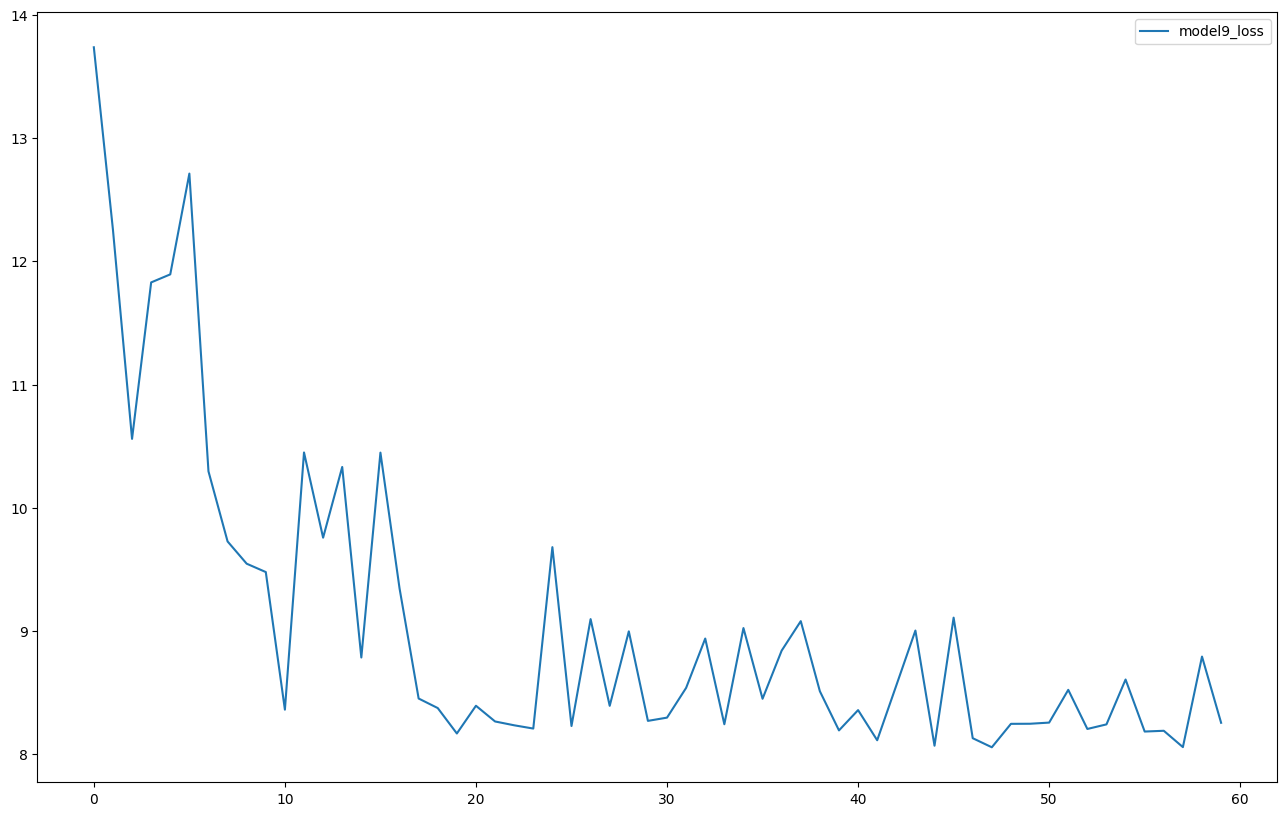

In [ ]:
plot([('model9_loss', valid_loss_values9)])

In [ ]:
valid_loss_values9[30:]

[8.298315661968571,
 8.539828234379835,
 8.939951914961975,
 8.244487099128195,
 9.025025398424356,
 8.451384701941272,
 8.84200768010451,
 9.081130553000044,
 8.512304833619902,
 8.194649814969242,
 8.35934418085778,
 8.114734883945767,
 8.559207391620863,
 9.004910284929936,
 8.070463253719971,
 9.10951140788522,
 8.131316580984851,
 8.057710014357426,
 8.247886874888202,
 8.248595162193373,
 8.257970835312758,
 8.523730115135118,
 8.206286234430747,
 8.24347456138913,
 8.607498227959812,
 8.185376733836561,
 8.191597894276724,
 8.059075618144309,
 8.793648584054248,
 8.256381798498701]

И попробуем добавить второй дропаут

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE1) # 90 нейронов
        self.batchnorm1 = nn.BatchNorm1d(HIDDEN_SIZE1)
        self.act1 = nn.LeakyReLU()
        self.dropout1 = nn.Dropout(0.2)

        self.layer2 = nn.Linear(in_features=HIDDEN_SIZE1, out_features=HIDDEN_SIZE2) # выход — 45 нейронов
        self.batchnorm2 = nn.BatchNorm1d(HIDDEN_SIZE2)
        self.act2 = nn.LeakyReLU()
        self.dropout2 = nn.Dropout(0.2)

        self.layer3 = nn.Linear(in_features=HIDDEN_SIZE2, out_features=HIDDEN_SIZE3) # выход — 20 нейронов
        self.batchnorm3 = nn.BatchNorm1d(HIDDEN_SIZE3)
        self.act3 = nn.LeakyReLU()
        self.output = nn.Linear(in_features=HIDDEN_SIZE3, out_features=OUTPUT_SIZE)

    def forward(self, x):
        x = self.layer1(x)
        x = self.batchnorm1(x)
        x = self.act1(x)
        x = self.dropout1(x)

        x = self.layer2(x)
        x = self.batchnorm2(x)
        x = self.act2(x)
        x = self.dropout2(x)

        x = self.layer3(x)
        x = self.batchnorm3(x)
        x = self.act3(x)
        x = self.output(x)
        return x

In [ ]:
from torch.optim.lr_scheduler import CyclicLR

model10 = MyModel()
optimizer = optim.Adam(model10.parameters(), lr=LEARNING_RATE, betas=(0.9, 0.999), eps=1e-08)
criterion = nn.MSELoss()
scheduler = CyclicLR(optimizer, base_lr=0.01, max_lr=0.1, mode='triangular2')

In [ ]:
train_loss_values, valid_loss_values10 = run_train(model10, optimizer=optimizer, criterion=criterion, scheduler=scheduler)

EPOCH 1, train_loss: 243.4250467373066, valid_loss: 12.242695959487763


EPOCH 11, train_loss: 9.070285616018415, valid_loss: 8.457400309567404


EPOCH 21, train_loss: 8.874479015723072, valid_loss: 8.444408633921405


EPOCH 31, train_loss: 8.82115882988829, valid_loss: 8.77527933427603


EPOCH 41, train_loss: 8.788340694365369, valid_loss: 8.123280226004006


EPOCH 51, train_loss: 8.760424709767555, valid_loss: 8.115805941643101


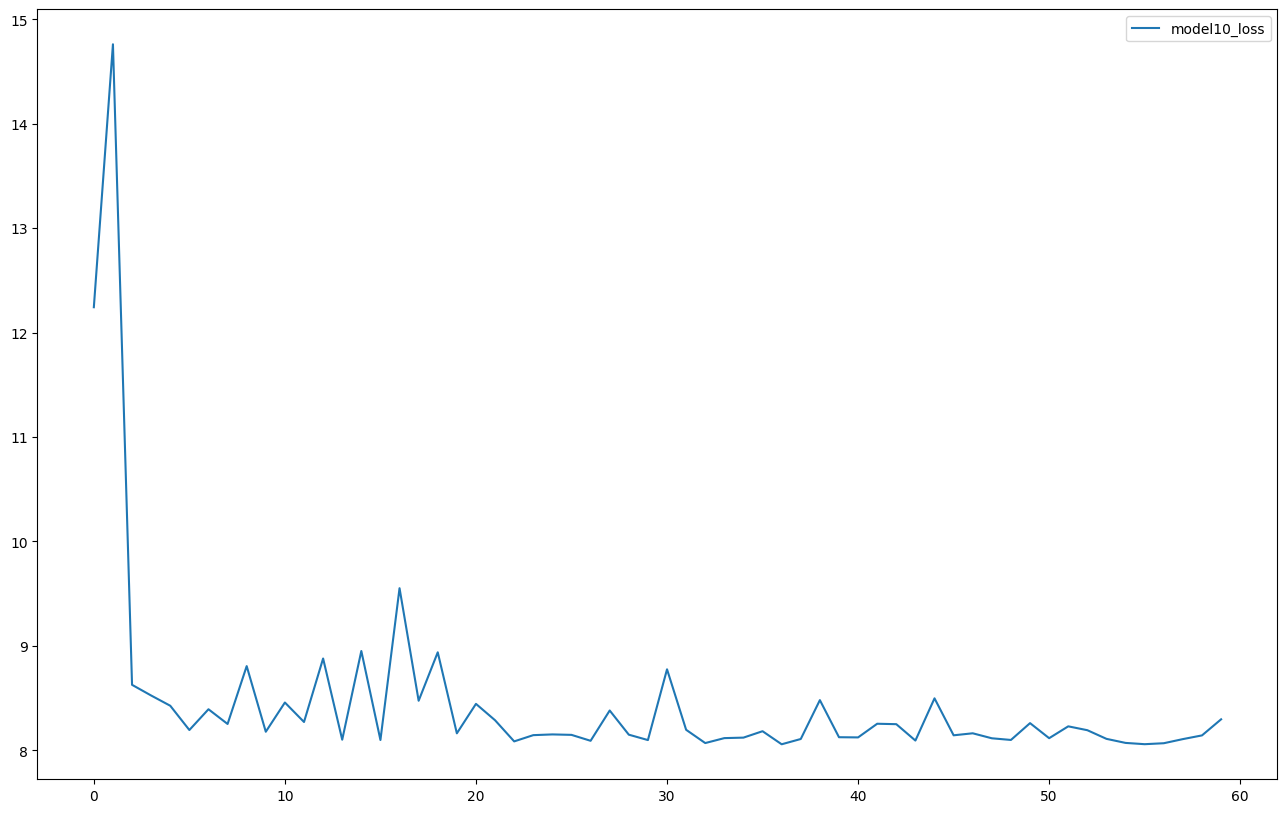

In [ ]:
plot([('model10_loss', valid_loss_values10)]) # с двумя дропаутами стало вроде бы ещё лучше

In [ ]:
valid_loss_values10[30:]

[8.77527933427603,
 8.196169379324015,
 8.069113540767443,
 8.116480236006256,
 8.121212351440203,
 8.182608741344792,
 8.057481016853068,
 8.108044454366853,
 8.480296974134918,
 8.12508908297756,
 8.123280226004006,
 8.254102182270277,
 8.24997504689906,
 8.093009543300855,
 8.497478344062767,
 8.143449399140803,
 8.162678861972129,
 8.114871821191052,
 8.09891813403309,
 8.259962129710924,
 8.115805941643101,
 8.229287575377096,
 8.1921969404315,
 8.109409708197754,
 8.070544285939471,
 8.058320642107784,
 8.067519828824715,
 8.10706667026671,
 8.14249185347321,
 8.296583373947898]

---------------------------------------------------------------

## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

**Try №1**

**Гиперпараметры**:

*   INPUT_SIZE = 90
*   HIDDEN_SIZE = 45
*   OUTPUT_SIZE = 1
*   BATCH_SIZE = 128
*   EPOCHS = 100
*   LEARNING_RATE = 0.001



**Архитектура**:
* 1-й слой — ReLU — dropout — 2-й слой — ReLU — dropout — output
* опитимизатор Adam

!!! данные не масштабировались

**RMSE** = 10.624320080964873

В целом это лучше наилучшего константного прогноза, но хуже бейзлайна, возможно, из-за слишком маленького lr

-------------------------------

**Try №2**

Масштабировала данные с помощью StandardScaler

**Гиперпараметры**: те же

**Архитектура**: та же

**RMSE** = 20.68163776869821 — это меня немного удивило, поскольку я ожидала, что стандартизация поможет...

!!! в дальнейшем использовались масштабированные данные

----------------------------------

**Try №3**

Увеличила lr

**Гиперпараметры**:
* INPUT_SIZE = 90
* HIDDEN_SIZE = 45
* OUTPUT_SIZE = 1
* BATCH_SIZE = 128
* EPOCHS = 100
* LEARNING_RATE = 0.01 (0.001 -> 0.01)

**Архитектура**: та же

**RMSE** = 9.910912220430847

Стало лучше, но всё ещё хуже бейзлайна

------------------------------------

**Try №4**

Убрала дропаут после активации второго слоя

**Гиперпараметры**: те же

**Архитектура**: 1-й слой — ReLU — dropout — 2-й слой — ReLU — output

**RMSE** = 8.686887505030867 (тут жизнь заиграла новыми красками :))

Получилось ещё лучше, поэтому в дальнейшем я оставила только один дропаут (кроме эксперимента, где я их вообще убрала)

------------------------------------

**Try №5**

Попробовала убрать все дропауты + уменьшила количество эпох (закончился GPU, и в целом заметила, что после 60-й эпохи уже достигается минимальный лосс, а дальше он скачет туда-сюда)

**Гиперпараметры**:
* INPUT_SIZE = 90
* HIDDEN_SIZE = 45
* OUTPUT_SIZE = 1
* BATCH_SIZE = 128
* EPOCHS = 60 (100 -> 60)
* LEARNING_RATE = 0.01

**Архитектура**: та же, но без дропаутов

**RMSE** = 10.695226958482573

Видимо, совсем без дропаутов не очень хорошо...

------------------------------------

**Try №6**

Добавила scheduler

**Гиперпараметры**: те же

**Архитектура**: та же (вернула дропаут после активации первого слоя)
* scheduler: CyclicLR (перебирает learning_rate от 0.01 до 0.1). Решила взять его, потому что когда я игралась с ними в семинарской тетрадке, он мне показался самым эффективным

**RMSE** = 8.673633255580864

Не то что бы с ним стало намного лучше, совсем чуть-чуть (ну, хотя бы не хуже :)). На графике видно, что с ним лосс не так сильно скачет (хотя, возможно, этого не видно из-за масштаба графика)

------------------------------------

**Try №7**

Добавила batchnorm

**Гиперпараметры**: те же

**Архитектура**:

* 1-й слой — batchnorm — ReLU — dropout — 2-й слой — batchnorm — ReLU — output

**RMSE** = 8.642171122059963

Стало чуточку лучше


------------------------------------

**Try №8**

Взяла другую функцию активации — LeakyReLU

**Гиперпараметры**: те же

**Архитектура**:

* 1-й слой — batchnorm — LeakyReLU — dropout — 2-й слой — batchnorm — LeakyReLU — output

**RMSE** = 8.309499460871857

Видимо, в нашем случае LeakyReLU работает лучше

------------------------------------

**Try №9**

Изменила размерности слоёв: на первом слое 90 нейронов, на втором слое после выхода — 45 нейронов, в аутпуте — один

**Гиперпараметры**:
* INPUT_SIZE = 90
* HIDDEN_SIZE = 90 (45 -> 90)
* OUTPUT_SIZE = 1
* BATCH_SIZE = 128
* EPOCHS = 60
* LEARNING_RATE = 0.01

**Архитектура**:

* 1-й слой — batchnorm — LeakyReLU — dropout — 2-й слой(in_features=HIDDEN_SIZE, **out_features=HIDDEN_SIZE // 2**) — batchnorm — LeakyReLU — output

**RMSE** = 8.413725183741882

Тут я поняла, что всё это время смотрела лосс не на самой последней эпохе, а на 50-й....... Здесь на самой последней эпохе **RMSE** = 8.246524433688363, т.е. ещё лучше, но не знаю, насколько правдиво сравнение. В любом случае, либо лучше, либо не сильно хуже


------------------------------------

**Try №10**

10.1 Добавила третий слой и изменила размерности слоёв

**Гиперпараметры**:
* INPUT_SIZE = 90
* HIDDEN_SIZE1 = 90
* HIDDEN_SIZE2 = 45
* HIDDEN_SIZE3 = 20
* OUTPUT_SIZE = 1
* BATCH_SIZE = 128
* EPOCHS = 60
* LEARNING_RATE = 0.01

**Архитектура**:

* 1-й слой (90, 90) — batchnorm — LeakyReLU — dropout — 2-й слой (90, 45) — batchnorm — LeakyReLU — 3-й слой (45, 20) — LeakyReLU — output

**RMSE** = 8.256381798498701

———————————————————————————

10.2 Вернула дропаут после активации второго слоя

**Гиперпараметры**: те же

**Архитектура**:

* 1-й слой (90, 90) — batchnorm — LeakyReLU — dropout — 2-й слой (90, 45) — batchnorm — LeakyReLU — dropout — 3-й слой (45, 20) — LeakyReLU — output

**RMSE** = 8.115805941643101

В этот раз большее количество дропаутов (но не всех слоёв) помогло

Сильно стало лучше после того, как я установила learning_rate = 0.01, затем после того, как оставила один дропаут (а потом добавила batchnorm), СИЛЬНО лучше с LeakyReLU, ну и когда усложнила архитектуру (добавила ещё один слой и разное кол-во нейронов на них).



Я везде использовала только один оптимизатор (по опыту он был эффективнее остальных), можно было бы еще попробовать rmsprop, например. Также можно было бы поиграться и со schedulers, в разные места пихать дропауты и batchnorm (перед активацией или после)